## S=[‘A’,’B’,’C’,’D’,’E’]에서 2개를 중복을 허락하지 않고 랜덤하게 추출하시오.

In [2]:
# ord()는 문자의 unicode를 반환하는 함수
ord('A')

65

In [3]:
# 직전 셀의 결과를 다시 문자로 변환
chr(_)

'A'

In [4]:
# 알파벳 리스트 생성
S=[chr(i) for i in range(ord('A'),ord('F'))]
S

['A', 'B', 'C', 'D', 'E']

In [5]:
from random import sample
sample(S,2)

['C', 'A']

In [6]:
from random import choices
choices(S,k=4)

['E', 'A', 'C', 'D']

## 정수 -5에서 5까지의 정수에서 랜덤하게 20개를 무작위 추출하고 히스토그램으로 그려보아라. 

In [7]:
import random as rd 

A=[rd.randint(-5,5) for _ in range(20)]
A

[3, 3, 0, -2, -2, 3, 5, 0, -2, 0, -2, -1, 3, 0, 3, -4, -2, 4, -1, 4]

In [8]:
import numpy as np
np.random.randint(-5,6,size=20)

array([ 5,  1, -4, -4, -2, -5, -5,  4, -2, -3,  0, -1,  1,  2, -1, -1, -3,
       -3, -4,  0])

### 50명의 학생 중 자바언어를 아는 학생은 30명, C언어를 아는 학생은 18명, 파이썬 언어를 아는 학생은 26명이다. 9명은 자바와 C를 하고, 16명은 자바와 파이썬, 8명은 파이썬과 C를 안다고 한다. 적어도 하나의 언어를 아는 학생이 47명이라고 할 때, 자바는 알지만 C나 파이썬은 알지 못하는 학생 수는 모두 몇 명인가? 

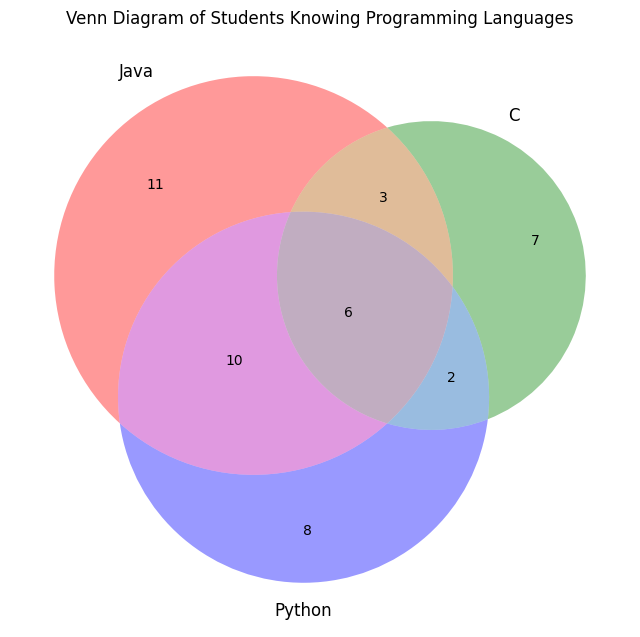

({'100': 11, '010': 7, '001': 8, '110': 3, '101': 10, '011': 2, '111': 6}, 3)

In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 주어진 값
J = 30  # Java
C = 18  # C
P = 26  # Python

JC = 9  # Java ∩ C
JP = 16  # Java ∩ Python
CP = 8  # C ∩ Python

# 적어도 하나의 언어를 아는 학생 수
at_least_one = 47

# 세 언어 모두 아는 학생 수 (이미 계산으로 6명)
JCP = 6

# 나머지 교집합에서 JCP를 빼줘야 순수한 두 집합만 아는 학생 수
JC_only = JC - JCP  # Java ∩ C only
JP_only = JP - JCP  # Java ∩ Python only
CP_only = CP - JCP  # C ∩ Python only

# 각 집합 단독 (오직 한 언어만 아는 사람)
J_only = J - JC_only - JP_only - JCP
C_only = C - JC_only - CP_only - JCP
P_only = P - JP_only - CP_only - JCP

# 아무 언어도 모르는 학생 수
none = 50 - at_least_one

# 데이터 확인
areas = {
    '100': J_only,
    '010': C_only,
    '001': P_only,
    '110': JC_only,
    '101': JP_only,
    '011': CP_only,
    '111': JCP
}

# 벤 다이어그램 그리기
plt.figure(figsize=(8, 8))
venn3(subsets=areas, set_labels=('Java', 'C', 'Python'))
plt.title("Venn Diagram of Students Knowing Programming Languages")
plt.show()

# 각 영역 출력
areas, none


## 자연수 n,m 에 대하여, 3n+m=16를 만족하는 (n,m) 순서쌍은 모두 몇 개가 존재할까?

In [3]:
import pandas as pd

# 집합 A와 B 정의
A = [1, 2, 3, 4, 5]  # n의 가능한 값
B = list(range(1, 17))  # m의 가능한 값 (1부터 16까지)

# 관계 R = {(n, m) | 3n + m = 16}
relation = set()
for n in A:
    m = 16 - 3 * n
    if m in B:
        relation.add((n, m))

# 논리 행렬 M 생성
M = []
for n in A:
    row = []
    for m in B:
        if (n, m) in relation:
            row.append("T")  # 관계가 성립
        else:
            row.append("F")  # 관계가 성립하지 않음
    M.append(row)

# 데이터프레임으로 변환
df = pd.DataFrame(M, index=[f"A={n}" for n in A], columns=[f"B={m}" for m in B])
df

,B=1,B=2,B=3,B=4,B=5,B=6,B=7,B=8,B=9,B=10,B=11,B=12,B=13,B=14,B=15,B=16
A=1,F,F,F,F,F,F,F,F,F,F,F,F,T,F,F,F
A=2,F,F,F,F,F,F,F,F,F,T,F,F,F,F,F,F
A=3,F,F,F,F,F,F,T,F,F,F,F,F,F,F,F,F
A=4,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,F
A=5,T,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F


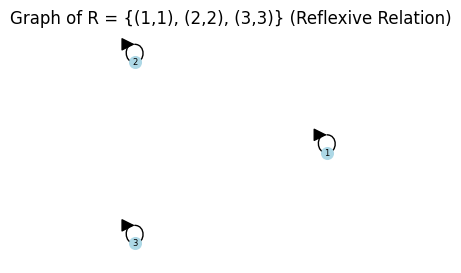

In [8]:
# conda install -c conda-forge networkx
import networkx as nx
import matplotlib.pyplot as plt

# 집합 A와 관계 R 정의
A = [1, 2, 3]
R = [(1, 1), (2, 2), (3, 3)]  # 자기 자신으로 가는 관계 (루프)

# 방향 그래프 생성
G = nx.DiGraph()  # 방향 그래프 (Directed Graph)
G.add_nodes_from(A)  # 노드 추가
G.add_edges_from(R)  # 엣지(관계) 추가

# 그래프 시각화
plt.figure(figsize=(3, 3))  # 그래프 크기 조절
pos = nx.circular_layout(G)  # 원형 배치로 노드 위치 지정
nx.draw_networkx_nodes(G, pos, node_size=70, node_color='lightblue')  # 노드 스타일
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')  # 노드 라벨
nx.draw_networkx_edges(G, pos, connectionstyle='arc3,rad=0.3', arrows=True, arrowsize=20)  # 엣지 스타일 (루프 표시)

plt.title("Graph of R = {(1,1), (2,2), (3,3)} (Reflexive Relation)")  # 제목
plt.axis('off')  # 축 숨기기
plt.show()  # 그래프 보여주기


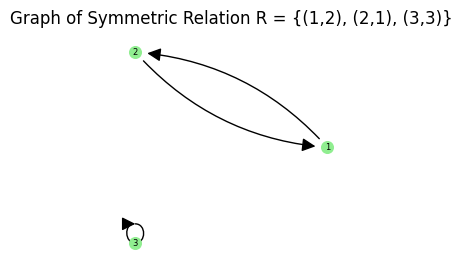

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# 집합 A와 대칭적 관계 R 정의
A = [1, 2, 3]  # 집합 A
R = [(1, 2), (2, 1), (3, 3)]  # 대칭적 관계 (1↔2, 3 루프)

# 방향 그래프(DiGraph) 생성
G = nx.DiGraph()
G.add_nodes_from(A)  # 노드 추가
G.add_edges_from(R)  # 관계(엣지) 추가

# 그래프 시각화
plt.figure(figsize=(3, 3))  # 그래프 크기 조정
pos = nx.circular_layout(G)  # 원형 배치로 노드 배치

# 노드 그리기
nx.draw_networkx_nodes(G, pos, node_size=70, node_color='lightgreen')

# 노드 라벨 표시
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')

# 엣지(관계) 그리기 (화살표로 방향 표시, 곡선으로 교차 방지)
nx.draw_networkx_edges(G, pos, connectionstyle='arc3,rad=0.2', arrows=True, arrowsize=20)

# 그래프 제목 및 축 숨기기
plt.title("Graph of Symmetric Relation R = {(1,2), (2,1), (3,3)}")
plt.axis('off')
plt.show()


## binomial vs multinomial coefficients

In [1]:
from sympy import binomial,symbols

n,k=symbols('n k',integer=True, nonnegative=True)
binomial(n,k)

binomial(n, k)

In [2]:
binomial(n,3)

binomial(n, 3)

In [2]:
from sympy import factorial,symbols

n,k_1,k_2,k_3=symbols('n k_1 k_2 k_3',
                      integer=True, nonnegative=True)

def multinomial_coeff(*ks):
    n = sum(ks)
    numerator = factorial(n)
    denominator = 1
    for k in ks:
        denominator *= factorial(k)
    return numerator / denominator

multinomial_coeff(k_1, k_2, k_3)

factorial(k_1 + k_2 + k_3)/(factorial(k_1)*factorial(k_2)*factorial(k_3))

In [3]:
multinomial_coeff(3, 2, 2)

210

## $ \sum_{k=0}^{n} \binom{n}{k} = 2^n $


In [1]:
from sympy import binomial,symbols,summation

n,k=symbols('n k',integer=True, nonnegative=True)
summation(binomial(n,k),(k,0,n))

2**n

## $ \sum_{k=0}^{n} k \binom{n}{k} = n 2^{n-1} $


In [5]:
summation(k*binomial(n,k),(k,0,n))

Piecewise((2**(n - 1)*factorial(n)/factorial(n - 1), (n > 1) | ((n <= 1) & (n > 0))), (Sum(k*binomial(n, k), (k, 0, n)), True))

In [6]:
_.args[0][0].simplify()

2**(n - 1)*n

## $ \sum_{k=0}^{n} \frac{1}{k + 1} \binom{n}{k} = n 2^{n-1} $


In [9]:
from sympy import integrate

x=symbols('x')
integrate((x+1)**n,(x,0,1))

2**(n + 1)/(n + 1) - 1/(n + 1)

In [7]:
summation((1/(k+1))*binomial(n,k),(k,0,n))

2**(n + 1)/(n + 1) - 1/(n + 1)

## $ \binom{n}{k} = \binom{n-1}{k}+\binom{n-1}{k-1} $

In [1]:
from sympy import binomial,symbols,summation

n,k=symbols('n k',integer=True, nonnegative=True)
expr=binomial(n-1,k)+binomial(n-1,k-1)
expr.simplify()

binomial(n, k)

### (Stirling numbers of the 2nd kind) 20명의 학생을 10개의 그룹으로 나누는 모든 경우의 수를 구하여라. (단, 그룹에는 반드시 1명은 있어야 한다. 

In [35]:
# 제2종 스털링 수 S(n, k)를 재귀 함수로 구현 

def stirling_second_kind_recursive(n, k):
    # 기본 조건
    if n == k == 0:
        return 1  # S(0,0) = 1
    if n == 0 or k == 0:
        return 0  # n 또는 k가 0이면 0

    # 점화식: S(n, k) = S(n-1, k-1) + k * S(n-1, k)
    result = stirling_second_kind_recursive(n - 1, k - 1) \
            + k * stirling_second_kind_recursive(n - 1, k)
    return result

In [36]:
# S(1, 1) 재귀로 계산
stirling_second_kind_recursive(1,1)

1

In [37]:
# S(20, 10) 재귀로 계산
stirling_second_kind_recursive(20, 10)

5917584964655

In [38]:
# 피보나치 수열과 메모이제이션

memo = {}
def fib(n):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fib(n-1) + fib(n-2)
    return memo[n]

In [40]:
fib(100)

354224848179261915075

In [30]:
# 제2종 스털링 수 S(n, k)를 재귀 함수로 구현 (메모이제이션 포함)

def stirling_second_kind_recursive(n, k, memo={}):
    # 메모이제이션: 이미 계산된 값이 있으면 반환
    if (n, k) in memo:
        return memo[(n, k)]
    
    # 기본 조건
    if n == k == 0:
        return 1  # S(0,0) = 1
    if n == 0 or k == 0:
        return 0  # n 또는 k가 0이면 0

    # 점화식: S(n, k) = S(n-1, k-1) + k * S(n-1, k)
    result = stirling_second_kind_recursive(n - 1, k - 1, memo) \
            + k * stirling_second_kind_recursive(n - 1, k, memo)
    
    # 메모이제이션 저장
    memo[(n, k)] = result
    return result

In [31]:
# S(1, 1) 재귀로 계산
stirling_second_kind_recursive(1,1)

1

In [32]:
# S(20, 10) 재귀로 계산
stirling_second_kind_recursive(20, 10)

5917584964655

### (Integer partition) 자연수 3을 최대 2이하의 자연수로 분할하는 방법은 1+1+1,1+2의 2가지 방법이 존재한다. 자연수 20을 최대 4이하의 정수로 분할하는 경우의 수를 구하여라. 

In [41]:
def partition(n, k, memo={}):
    if (n, k) in memo:
        return memo[(n, k)]
    if n == 0:
        return 1
    if n < 0 or k == 0:
        return 0
    result = partition(n - k, k, memo) + partition(n, k - 1, memo)
    memo[(n, k)] = result
    return result

In [42]:
partition(20,4)

108

### 주사위 2개를 동시에 던졌을 때, 두 주사위 눈의 합이 8보다 클 확률을 구하여라.

In [1]:
from sympy.stats import P, Die
# 1부터 4의 자연수 확률분포
X=Die('X',4)
P(X<=1) # X가 1이하일 확률

1/4

In [2]:
P(X<=4) # X가 4이하일 확률

1

In [3]:
# X의 랜덤 샘플 10개 구하기
from sympy.stats import sample

sample(X,size=(1,10))

array([[2, 3, 2, 3, 4, 1, 1, 2, 1, 4]])

In [4]:
# X의 랜덤 샘플 10개 구하기 (다른 방법)
from sympy.stats import sample

samples=[sample(X) for _ in range(10)]
samples

[4, 3, 2, 3, 3, 3, 3, 1, 4, 4]

In [5]:
# 확률밀도 함수 표현하기
from sympy.stats import density
from sympy import symbols

k=symbols('k',positive=True, integer=True)
f=lambda k: density(X)(k)
f(k)

Piecewise((1/4, k <= 4), (0, True))

In [6]:
# 평균과 분산
from sympy.stats import E, variance

E(X) # 평균

5/2

In [7]:
variance(X) # 분산

5/4

In [10]:
from sympy.stats import P, Die

# 두 개의 주사위를 정의합니다.
D1 = Die('D1', 6)
D2 = Die('D2', 6)

# D1과 D2의 합이 8보다 클 확률
P(D1 + D2 > 8)

5/18

In [7]:
# 검증
# 주사위의 순서쌍 만들기
dies=[(d1,d2) for d1 in range(1,7) for d2 in range(1,7)]
len(dies) # 전체 사건의 수

36

In [8]:
# (d1 + d2) > 8 인 경우 출력
result = [(d1, d2) for d1, d2 in dies if (d1 + d2) > 8]
len(result)

10

### 앞문제에서 D1=5인 경우일 때, D1+D2>8일 확률을 구하여라. 

In [12]:
# d1=5이고, (d1 + d2) > 8 인 경우 출력
result = [(d1, d2) for d1,d2 in dies if (d1 + d2) > 8 and d1==5]
len(result)

3

In [13]:
from sympy import Rational
Rational(3,36)/Rational(1,6)

1/2

### 하나의 모자 안에 1부터 10까지 숫자가 각각 적힌 카드 10장이 들어있다. 카드를 무작위로 하나 추출한다고 할 때, 이 카드가 적어도 5일 확률은 얼마인가? 적어도 5인 상황에서 카드가 10일 확률은 어떻게 되는가?

In [17]:
from sympy.stats import P, Die

# 확률변수 정의
X = Die('X', 10)

P_A=P(X>=5)
P_A

3/5

In [18]:
P_B=P(X>=10)
P_B

1/10

In [19]:
P_B/P_A

1/6

### 세 사람이 방 안에 자신의 모자를 던져두고, 모자를 랜덤하게 섞은 후 한 사람씩 자신의 모자를 랜덤하게 선택하고 있다. 세 사람 모두 자신의 모자를 선택하지 못할 확률을 계산하시오.

In [6]:
import itertools

hats=['A','B','C']
selected_hats=itertools.permutations(hats)
for p in selected_hats:
    print(p)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


### 두 개의 주사위를 던지는 실험을 한다. 사건 A를 첫번째 주사위의 눈이 4인 경우로 하고, 사건 B를 두 눈의 합이 7인 경우라고 하자. 이 때, P(B|A)를 구하여 보아라. 

In [13]:
from sympy.stats import P, Die
from sympy import Eq

# 두 개의 주사위를 정의합니다.
D1 = Die('D1', 6)
D2 = Die('D2', 6)

# D1과 D2의 합이 7일 확률
P(Eq(D1 + D2, 7))

1/6

In [19]:
P(D1+D2==7)

0

In [20]:
P(D1+D2>6)-P(D1+D2>7)

1/6

In [21]:
P(Eq(D1,4) & Eq(D2,3))

1/36

In [18]:
# (d1 + d2) ==7 인 경우 출력
dies=[(d1,d2) for d1 in range(1,7) for d2 in range(1,7)]
result = [(d1, d2) for d1, d2 in dies if (d1 + d2) == 7]
result

[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]

In [10]:
from sympy import symbols, Union, Intersection, Complement

# 집합 기호 정의
A, B, C = symbols('A B C', cls=FiniteSet)

# 합집합 A ∪ B ∪ C
A_union_B_union_C = Union(A, B, C)

# 교집합
A_intersect_B = Intersection(A, B)
A_intersect_C = Intersection(A, C)
B_intersect_C = Intersection(B, C)
A_intersect_B_intersect_C = Intersection(A, B, C)
A_union_B_union_C

{A, B, C}

In [12]:
Intersection(A,B)

Intersection({A}, {B})

# 주사위 던지기

In [8]:
from sympy import symbols
from sympy.stats import Die, density
k=symbols('k',integer=True, positive=True)
X=Die('X')
density(X)(k) # 확률질량함수 구하기

Piecewise((1/6, k <= 6), (0, True))

In [9]:
from sympy.stats import E, variance
E(X) # 평균구하기

7/2

In [10]:
variance(X) # 분산구하기

35/12

In [11]:
# sample 출력
from sympy.stats import sample
# size 인자는 출력되는 데이터의 형태를 지정해 준다. 
sample(X,size=(3,4))

array([[5, 6, 4, 5],
       [2, 3, 4, 3],
       [3, 4, 5, 1]])

## 어떤 사람이 현재 k원이 있고, 매 게임마다 1원을 걸어 게임을 한다. 확률 p로 이기면 1원 증가, 확률 1-p 로 지면 1원 감소한다. 목표 금액 N원을 달성하거나, 파산하여 0원이 되면 게임은 끝나게 된다. 현재 k원을 가진 사람이 목표 금액 N원을 달성할 확률을 구하여라.

In [6]:
from sympy import symbols, Function, Eq, rsolve

# 변수 및 함수 정의
k= symbols('k', integer=True, positive=True)
P = Function('P')
p = 0.4

# 차분 방정식 정의
diff_eq = Eq(P(k), p*P(k+1)+(1-p)*P(k-1))

# 초기 조건 추가(딕셔너리 자료형)
init_conditions = {P(0):0, P(200):1}

# 해 구하기
solution = rsolve(diff_eq, P(k),init_conditions)
solution.subs(k,100) #k=100 대입

2.45965442657986e-18

In [8]:
C0=1/(1-1.5**200)
C0-C0*(3/2)**100

2.4596544265798292e-18

# 이항분포

In [36]:
from sympy import summation, symbols, binomial 
n,k=symbols('n k', integer=True,nonnegative=True)
p=symbols('p',nonnegative=True)
summation(binomial(n,k),(k,0,n))

2**n

In [40]:
from sympy import summation, symbols, binomial 
n,k=symbols('n k', integer=True,nonnegative=True)
p=symbols('p',nonnegative=True)
# 확률이 1이 됨을 증명
summation(binomial(n,k)*p**k*(1-p)**(n-k),(k,0,n)).simplify()

Piecewise((1, (Eq(n, 0) | (n > 0)) & (p/Abs(p - 1) <= 1)), (Sum(p**k*(1 - p)**(-k + n)*binomial(n, k), (k, 0, n)), True))

In [41]:
# 이항분포의 평균 검증
summation(k*binomial(n,k)*p**k*(1-p)**(n-k),(k,0,n)).simplify()

Piecewise((n*p, (Eq(n, 0) & (p/Abs(p - 1) < 1)) | ((n > 0) & (p/Abs(p - 1) <= 1)) | ((n > 1) & (p/Abs(p - 1) <= 1))), (factorial(n)*Sum(p**k*(1 - p)**(-k + n)/(factorial(-k + n)*factorial(k - 1)), (k, 0, n)), True))

In [43]:
# E(X(X-1)) 계산
summation(k*(k-1)*binomial(n,k)*p**k*(1-p)**(n-k),(k,1,n)).simplify()

KeyboardInterrupt: 

# 동전을 던져서 앞면이 나올 확률은 1/2이다. 100번을 던졌을 때 동전의 앞면이 20번이하로 나올 확률을 구하여라. 

In [44]:
# P(X<=20) 직접구하기
n,p=100,0.5
summation(binomial(n,k)*p**k*(1-p)**(n-k),(k,0,20)).simplify()

5.57954452862598e-10

In [52]:
from sympy.stats import Binomial,P
# 확률변수 X를 이항분포로 정의
X=Binomial('X',100,1/2)
P(X<=20)

5.57954452862598e-10

In [46]:
from sympy.stats import density
# 확률질량함수 구하기
n=symbols('n',integer=True,nonnegative=True)
density(X)(n)

Piecewise((0.5**n*0.5**(100 - n)*binomial(100, n), n <= 100), (0, True))

In [28]:
# 확률값 검증
P(X<=100)

1.00000000000000

In [47]:
out=density(X)(n)
# 사용자 정의 함수로 정의
f=lambda n: out.args[0][0]
f(n)

0.5**n*0.5**(100 - n)*binomial(100, n)

In [48]:
from sympy import summation
summation(f(n),(n,0,100))

1.00000000000000

In [49]:
# P(X<=20) 구하기
summation(f(n),(n,0,20))

5.57954452862598e-10

In [35]:
# def 함수 착성
def hst_fun(x,y):
    return x**2+y**2
hst_fun(2,2)

8

In [37]:
# lambda 함수 작성
hst_fun=lambda x,y: x**2+y**2
hst_fun(2,2)

8

In [32]:
from sympy import binomial
# 서로 다른 100개에서 n개를 순서와 상관없이 고르는 방법
binomial(100,n)

binomial(100, n)

In [33]:
# 서로 다른 5개에서 순서 무관 2개
binomial(5,2)

10

In [54]:
from sympy.stats import E, variance
# 평균 구하기
E(X)

50.0000000000000

In [55]:
# 분산 구하기
variance(X)

25.0000000000000

### 어떤 항공기를 예약한 승객 중 탑승 당일 취소할 확률이 5%라고 한다. 50좌석의 항공기인데, 좌석은 52개가 팔렸다. 실제 이 항공기의 탑승객이 모두 좌석을 가질 확률은 얼마나 될까?

In [69]:
X=Binomial('X',52,0.95)
P(X<=50)

0.740503070879285

### 한 시간 동안 평균적으로 5건의 전화가 오는 콜센터에서 특정 시간에 3건의 전화가 올 확률은 얼마나 될까?

In [2]:
from sympy import summation, symbols, factorial, exp, oo
n,k=symbols('n k', integer=True,nonnegative=True)
lamda=symbols('λ',positive=True)
summation(exp(-lamda)*lamda**k/factorial(k),(k,0,oo))

1

In [3]:
# E(X) 구하기
summation(k*exp(-lamda)*lamda**k/factorial(k),(k,0,oo))

λ

In [6]:
# E(X(X-1)) 구하기
S=summation(k*(k-1)*exp(-lamda)*lamda**k/factorial(k),(k,0,oo))
S.simplify()

λ**2

In [7]:
from sympy.stats import Poisson,density

X=Poisson('X',lamda)
density(X)(k)

λ**k*exp(-λ)/factorial(k)

In [8]:
# 평균과 분산
from sympy.stats import E,variance
E(X),variance(X)

(λ, λ)

In [21]:
from sympy.stats import P
from sympy import Eq

X=Poisson('X',5)
P(Eq(X,3))

125*exp(-5)/6

In [23]:
from sympy import N
# 직접계산하여 수치로 표현
lamda,k=5,3
out=exp(-lamda)*lamda**k/factorial(k)
N(out)

0.140373895814281

# 지수분포

In [37]:
from sympy import integrate, oo, exp

lamda,x=symbols('λ x', nonnegative=True)
integrate(lamda*exp(-lamda*x),(x,0,oo))

Piecewise((1, Abs(arg(λ)) < pi/2), (Integral(λ*exp(-x*λ), (x, 0, oo)), True))

In [25]:
from sympy.stats import Exponential, density

lamda,x=symbols('λ x', nonnegative=True)

X=Exponential('X',lamda)
density(X)(x)

λ*exp(-x*λ)

In [26]:
# 평균, 분산
E(X),variance(X)

(1/λ, λ**(-2))

In [40]:
# 포아송분포로 변환하여 풀기
Y=Poisson('Y',(1/10)*15)
1-P(Eq(Y,0))

0.776869839851570

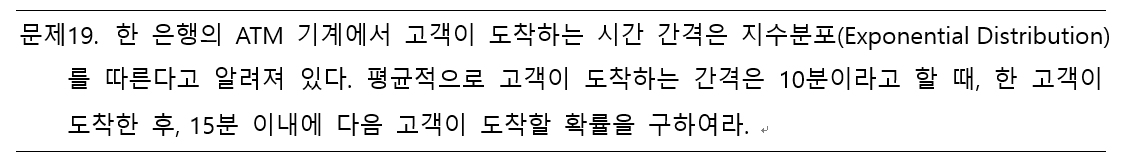

In [35]:
from sympy.stats import P
X=Exponential('X',0.1)
P(X<=15)

0.776869839851570

# 정규분포

In [56]:
from sympy import integrate,oo,sqrt, pi, exp
mu,x=symbols('μ x')
sig=symbols('σ',positive=True)
f=lambda x: (1/(sig*sqrt(2*pi)))*exp(-(1/2)*((x-mu)/sig)**2)
f(x)

sqrt(2)*exp(-0.5*(x - μ)**2/σ**2)/(2*sqrt(pi)*σ)

In [58]:
# 학률값이 1이 되는지 검증
integrate(f(x),(x,-oo,oo)).evalf()

1.00000000000000

# 확률변수 X가 평균 4, 표준편차 3인 정규분포를 따른다고 할 때, X의 확률밀도 함수를 그리고, skewness와 kurtosis 등을 구해 보아라. 

In [59]:
from sympy.stats import Normal, density

X=Normal('X',mu,sig)
density(X)(x)

sqrt(2)*exp(-(x - μ)**2/(2*σ**2))/(2*sqrt(pi)*σ)

In [60]:
# 평균 4, 표준편차 3인 정규분포 X 설정
from sympy.stats import E, variance
X=Normal('X',4,3)
E(X),variance(X)

(4, 9)

In [61]:
f=lambda x: density(X)(x)
f(x)

sqrt(2)*exp(-(x - 4)**2/18)/(6*sqrt(pi))

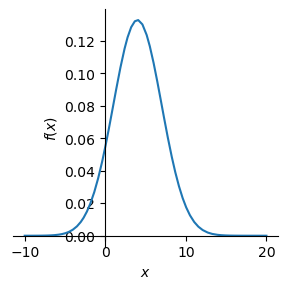

In [63]:
from sympy import plot
# sympy 내장함수 plot()을 이용하여 그래프로
# 정의역 x는 -10에서 20까지 영역으로 
plot(density(X)(x),(x,-10,20),size=(3, 3))

In [64]:
from sympy.stats import skewness,kurtosis
skewness(X)

0

In [67]:
# skewness 계산
E(((X-4)/3)**3)

0

In [65]:
kurtosis(X)

3

In [68]:
# kurtosis 계산
E(((X-4)/3)**4)

3

In [44]:
st.E((X-4)**2) # 분산

9

In [46]:
st.E(((X-4)/3)**3) # skewness

0

In [47]:
st.E(((X-4)/3)**4) # kurtosis

3

In [55]:
st.P(X>=1).evalf()

0.841344746068543

In [57]:
st.sample(X,size=(2,5))

array([[ 1.28039774, -1.67775887,  4.60971552,  6.81007243,  2.80754458],
       [-2.15131477,  2.80748263,  5.39552229, 11.64809185,  2.51650993]])

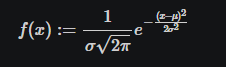

In [15]:
mu=sp.symbols('mu')
sigma=sp.symbols('sigma',positive=True)
x=sp.symbols('x',real=True)
X=st.Normal('X',mu,sigma)
st.density(X)(x)

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

### 어느 회사의 입사시험에서 전체 지원자 5000명의 시험 점수는 평균이 345점, 표준편차가 10점인 정규분포를 따른다고 한다. 점수가 365점 이상인 지원자는 몇 명이나 될까?

In [72]:
X=Normal('X',345,10)
P(X>=365).evalf()*5000

113.750659740896

In [73]:
E(X),variance(X)

(345, 100)

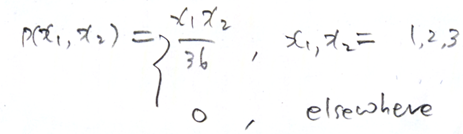

In [75]:
import pandas as pd 
import numpy as np
df=pd.DataFrame(data={'X1':[1,1,1,2,2,2,3,3,3],
                      'X2':[1,2,3,1,2,3,1,2,3]})

# 확률값을 계산하는 칼럼 추가
df['Prob']=df.X1*df.X2/36
df

,X1,X2,Prob
0,1,1,0.027778
1,1,2,0.055556
2,1,3,0.083333
3,2,1,0.055556
4,2,2,0.111111
5,2,3,0.166667
6,3,1,0.083333
7,3,2,0.166667
8,3,3,0.250000


In [59]:
df.Prob.sum()

1.0

In [76]:
# X1에 대한 marginal pmf
df.pivot_table(values='Prob',index='X1',aggfunc='sum')

,Prob
X1,
1,0.166667
2,0.333333
3,0.500000


In [77]:
import sympy as sp
x1,x2=sp.symbols('x1 x2',integer=True)
p=lambda x1,x2: x1*x2/36 # joint pmf
sp.summation(p(x1,x2),(x2,1,3))

x1/6

In [80]:
for i in range(3):
    print(f'x1={i+1},prob=',(i+1)/6)

x1=1,prob= 0.16666666666666666
x1=2,prob= 0.3333333333333333
x1=3,prob= 0.5
